<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#问题引入" data-toc-modified-id="问题引入-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>问题引入</a></span><ul class="toc-item"><li><span><a href="#实现原理" data-toc-modified-id="实现原理-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>实现原理</a></span></li></ul></li><li><span><a href="#数据导入" data-toc-modified-id="数据导入-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据导入</a></span><ul class="toc-item"><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>数据预处理</a></span></li><li><span><a href="#划分训练集和测试集" data-toc-modified-id="划分训练集和测试集-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>划分训练集和测试集</a></span></li><li><span><a href="#数据预览" data-toc-modified-id="数据预览-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>数据预览</a></span></li></ul></li><li><span><a href="#建立分类器" data-toc-modified-id="建立分类器-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>建立分类器</a></span><ul class="toc-item"><li><span><a href="#OneVsOneClassifier-一对一分类器" data-toc-modified-id="OneVsOneClassifier-一对一分类器-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>OneVsOneClassifier 一对一分类器</a></span><ul class="toc-item"><li><span><a href="#建立元估计器" data-toc-modified-id="建立元估计器-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>建立元估计器</a></span></li><li><span><a href="#对分类器进行测试，对测试集进行预测" data-toc-modified-id="对分类器进行测试，对测试集进行预测-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>对分类器进行测试，对测试集进行预测</a></span></li></ul></li><li><span><a href="#OneVsRestClassifier-一对多分类器" data-toc-modified-id="OneVsRestClassifier-一对多分类器-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>OneVsRestClassifier 一对多分类器</a></span><ul class="toc-item"><li><span><a href="#建立元估计器" data-toc-modified-id="建立元估计器-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>建立元估计器</a></span></li><li><span><a href="#对分类器进行测试，对测试集进行预测" data-toc-modified-id="对分类器进行测试，对测试集进行预测-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>对分类器进行测试，对测试集进行预测</a></span></li></ul></li></ul></li></ul></div>

# 问题引入

手写数字识别是一个多分类的问题

对于多类别分类问题
 
手写数字有 0-9 十类，但手头上只有两分类估计器 (比如像支撑向量机) 怎么用呢？我们可以采取下面两种种常见策略：

一对一 (One vs One, OvO)：一个分类器用来处理数字 0 和数字 1，一个用来处理数字 0 和数字 2，一个用来处理数字 1 和 2，以此类推。N 个类需要 N(N-1)/2 个分类器。

一对其他 (One vs All, OvA)：训练 10 个二分类器，每一个对应一个数字，第一个分类 1 和「非1」，第二个分类 2 和「非2」，以此类推。N 个类需要 N 个分类器。

## 实现原理

##### OneVsOneClassifier

 

考虑一个具体天气多分类问题，天气可以是晴天、阴天和雨天，在 OvO 中，三个分类器为 f1 , f2 和 f3 。

 

f1 负责分类三角形和正方形

f2 负责分类三角形和圆形

f3 负责分类圆形和正方形

 

结果如下

 

f1 预测 ▲

f2 预测 ▲ 

f3 预测 ●

 

根据多数原则得到的结合预测为 ▲，如下图所示。

In [1]:
from IPython.display import Image
Image(url='https://img-blog.csdnimg.cn/img_convert/027f29d41fbc97a9a8fd381bfb9f7fec.png')

一对一的分类器的思想是，对于随机的每两种类别组合，分别有一个分类器对其进行分类，对于0-9的手写数字识别问题，在10种标签中选取两种进行一次分类，然后综合所有的分类器的结果进行选取

##### OneVsRestClassifier

 

在 OvA 中，把数据分成“某个”和“其他”

 

图一，某个 = 三角形，其他 = 正方形和圆形

图二，某个 = 正方形，其他 = 三角形和圆形

图三，某个 = 圆形，其他 = 三角形和正方形

 

三分类分解成三个二分类，对应的分类器为 f1 , f2 和 f3 。

 

f1 预测负类，即预测 ● 和 ◼

f2 预测负类，即预测 ▲ 和 ●

f3 预测正类，即预测 ●

 

三个分类器都预测了 ●，根据多数原则得到的预测是 ●。

In [2]:
Image(url='https://img-blog.csdnimg.cn/img_convert/48ced3261bbd1e2cf0f6486579a37ca3.png')

而对于一对多分类问题，可以采取的办法是，对于每一种类别，分别和其余类别进行分类，从而完整整个分类问题

# 数据导入

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()#查看数据集的所有的keys

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits['data']#查看像素的值

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digits['data'].shape#每一张图片是1*64像素的图片

(1797, 64)

In [6]:
digits['target']#查看标签的值

array([0, 1, 2, ..., 8, 9, 8])

## 数据预处理

In [7]:
import numpy as np
np.isnan(digits['target'])#查看是否有缺失值

array([False, False, False, ..., False, False, False])

## 划分训练集和测试集

In [8]:
from sklearn.model_selection import train_test_split
#划分训练集与测试集的比例为8:2
X_train, X_test, y_train, y_test = train_test_split( digits['data'],digits['target'],test_size=0.2 )
print( 'The size of X_train is ', X_train.shape )
print( 'The size of y_train is ', y_train.shape )
print( 'The size of X_test is ', X_test.shape )
print( 'The size of y_test is ', y_test.shape )

The size of X_train is  (1437, 64)
The size of y_train is  (1437,)
The size of X_test is  (360, 64)
The size of y_test is  (360,)


## 数据预览

训练集和测试集分别有 1437 和 360 张图像。每张照片是包含 8×8 的像素，将其打平 (flatten) 把 2 维的 8×8 重塑成 1 维的 64。

看看训练集中前 100 张图片和对应的标签 (左下角蓝色小字)

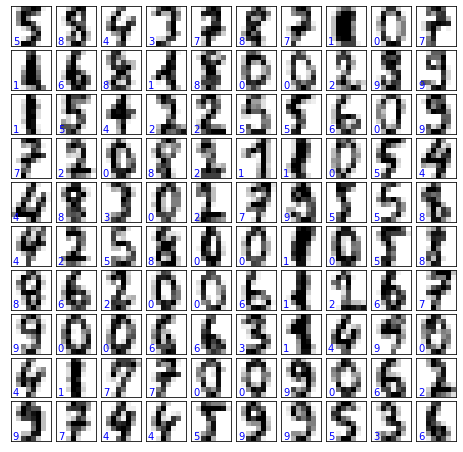

In [9]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(10,10,figsize=(8,8))
fig.subplots_adjust(hspace=0.1,wspace=0.1)

for i,ax in enumerate(axes.flat):
    ax.imshow(X_train[i,:].reshape(8,8),cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(y_train[i]),
            transform=ax.transAxes,color='blue')
    ax.set_xticks([])
    ax.set_yticks([])  

# 建立分类器

## OneVsOneClassifier 一对一分类器

### 建立元估计器

In [10]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
ovo_SVC=OneVsOneClassifier(SVC(kernel='linear'))#建立一个元估计器，其中的base估计器是SVC,SVC使用的是线性核函数
ovo_SVC.fit(X_train,y_train)#对这个估计器进行拟合

OneVsOneClassifier(estimator=SVC(kernel='linear'))

In [11]:
ovo_SVC.get_params()#查看ovo_SVC参数

{'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'linear',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(kernel='linear'),
 'n_jobs': None}

##### 查看base估计器的个数,共45个分类器，即10*9/2=45

In [12]:
print(len(ovo_SVC.estimators_))
ovo_SVC.estimators_

45


(SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel

### 对分类器进行测试，对测试集进行预测

In [13]:
from sklearn import metrics
print(y_test[:35])#测试集真实标签，前35个
print(ovo_SVC.predict(X_test)[:35])#预测出来的标签，前35个
print ( "OvO SVC - Accuracy (Train):  %.4g" %metrics.accuracy_score(y_train, ovo_SVC.predict(X_train)) )#对训练集进行预测的得分
print ( "OvO SVC - Accuracy (Test):  %.4g" %metrics.accuracy_score(y_test, ovo_SVC.predict(X_test)) )#对测试集进行预测的得分

[4 9 7 2 5 4 7 8 0 6 2 6 2 6 2 9 7 7 1 6 2 3 7 7 1 9 9 8 6 0 7 5 4 0 4]
[4 9 7 2 5 4 7 8 0 6 2 6 2 6 2 9 9 7 1 6 2 3 7 7 1 9 9 8 6 0 7 5 4 0 4]
OvO SVC - Accuracy (Train):  1
OvO SVC - Accuracy (Test):  0.9778


In [14]:
print(metrics.classification_report(y_test,y_pred=ovo_SVC.predict(X_test)))#查看y_test与y_pred之间关系报告

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        40
           3       1.00      0.97      0.98        33
           4       1.00      1.00      1.00        39
           5       0.97      0.94      0.96        34
           6       1.00      0.98      0.99        46
           7       1.00      0.96      0.98        28
           8       0.97      0.97      0.97        32
           9       0.90      0.97      0.93        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



##### 预测结果图

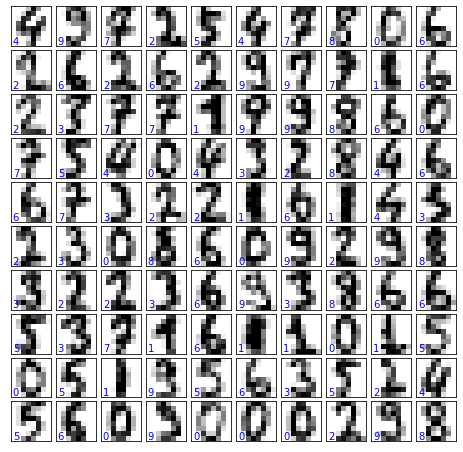

In [15]:
y_pred=ovo_SVC.predict(X_test)#ovo_SVC预测的结果
fig,axes=plt.subplots(10,10,figsize=(8,8))
fig.subplots_adjust(hspace=0.1,wspace=0.1)
for i,ax in enumerate(axes.flat):
    ax.imshow(X_test[i,:].reshape(8,8),cmap='binary',interpolation='nearest')#测试集的图像
    ax.text(0.05,0.05,str(y_pred[i]),#测试集预测结果值作为标签
            transform=ax.transAxes,color='blue')
    ax.set_xticks([])
    ax.set_yticks([])

## OneVsRestClassifier 一对多分类器

### 建立元估计器

In [16]:
from sklearn.multiclass import OneVsRestClassifier

ova_SVC=OneVsRestClassifier(SVC(kernel='linear'))#建立一个元估计器，其中的base估计器是线性核函数
ova_SVC.fit(X_train,y_train)#对数据进行拟合

OneVsRestClassifier(estimator=SVC(kernel='linear'))

In [17]:
ova_SVC.get_params()#查看ova_SVC参数

{'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'linear',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(kernel='linear'),
 'n_jobs': None}

##### 查看base估计器的个数，0-9共10类即10种

In [18]:
print(len(ova_SVC.estimators_))
ova_SVC.estimators_

10


[SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear'),
 SVC(kernel='linear')]

### 对分类器进行测试，对测试集进行预测

In [19]:
print(y_test[:35])#测试集真实标签，前35个
print(ova_SVC.predict(X_test)[:35])#预测出来的标签，前35个
print ( "OvA SVC - Accuracy (Train):  %.4g" %metrics.accuracy_score(y_train, ova_SVC.predict(X_train)) )#对训练集进行预测的得分
print ( "OvA SVC - Accuracy (Test):  %.4g" %metrics.accuracy_score(y_test, ova_SVC.predict(X_test)) )#对测试集进行预测的得分

[4 9 7 2 5 4 7 8 0 6 2 6 2 6 2 9 7 7 1 6 2 3 7 7 1 9 9 8 6 0 7 5 4 0 4]
[4 9 7 2 1 4 7 8 0 6 2 6 2 6 2 9 9 7 1 6 2 3 7 7 1 9 9 8 6 0 7 5 4 0 4]
OvA SVC - Accuracy (Train):  0.9937
OvA SVC - Accuracy (Test):  0.9333


In [20]:
print(metrics.classification_report(y_test,y_pred=ova_SVC.predict(X_test)))#查看y_test与y_pred之间关系报告

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.92      0.92        36
           2       0.89      0.97      0.93        40
           3       0.88      0.85      0.86        33
           4       1.00      0.97      0.99        39
           5       0.88      0.85      0.87        34
           6       0.98      0.98      0.98        46
           7       0.93      0.93      0.93        28
           8       0.91      0.97      0.94        32
           9       0.94      0.86      0.90        36

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360



##### 预测结果图

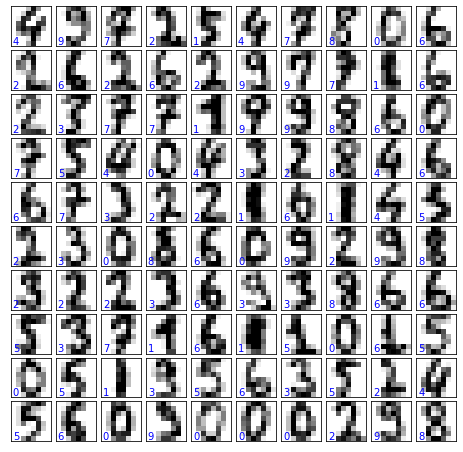

In [21]:
y_pred=ova_SVC.predict(X_test)#用ova_SVC预测的结果
fig,axes=plt.subplots(10,10,figsize=(8,8))
fig.subplots_adjust(hspace=0.1,wspace=0.1)
for i,ax in enumerate(axes.flat):
    ax.imshow(X_test[i,:].reshape(8,8),cmap='binary',interpolation='nearest')#测试集的图像
    ax.text(0.05,0.05,str(y_pred[i]),#测试集预测结果值作为标签
            transform=ax.transAxes,color='blue')
    ax.set_xticks([])
    ax.set_yticks([])